# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
def strip(x):
    values = {'M': 1000, 'K': 1}
    x = x.strip('€')
    if 'M' in x:
        x = float(x.strip('M'))*values['M']
    elif 'K' in x:
        x = float(x.strip('K'))*values['K']
        
    else:
        x = float(x)/1000
    return x

In [5]:
#expressed in thousands
fifa['ValueNumeric'] = fifa['Value'].apply(strip)

In [6]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [8]:
# Your code here:

model = ols('ValueNumeric ~ C(fifa["Preferred Foot"])*C(Position)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
"C(fifa[""Preferred Foot""])",2.341622e+08,1.0,7.734728,5.422475e-03
C(Position),1.657002e+10,26.0,21.051242,2.211476e-97
"C(fifa[""Preferred Foot""]):C(Position)",5.152828e+09,26.0,6.546369,5.153228e-23
Residual,5.477500e+11,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

In [9]:
# Your conclusions here:

#Podemos ver que los p-values obtenidos son menores de 0.05 con lo que hay diferencia


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [10]:
# Your code here:

model = ols('ValueNumeric ~ C(fifa["Nationality"])', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
"C(fifa[""Nationality""])",3.281224e+10,163.0,6.762478,4.840477e-134
Residual,5.370951e+11,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [11]:
#Podemos ver que los p-values obtenidos son menores de 0.05 con lo que hay diferencias segun nacionalidad

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [12]:
# Your code here:

fifa.isnull().sum()/len(fifa)*100

Name              0.000000
Age               0.000000
Nationality       0.000000
Overall           0.000000
Potential         0.000000
Club              1.323667
Value             0.000000
Preferred Foot    0.263635
Position          0.329544
Weak Foot         0.263635
Acceleration      0.263635
SprintSpeed       0.263635
Stamina           0.263635
Strength          0.263635
LongShots         0.263635
Aggression        0.263635
Interceptions     0.263635
Positioning       0.263635
Vision            0.263635
Penalties         0.263635
ValueNumeric      0.000000
dtype: float64

In [13]:
fifa = fifa.dropna()

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [14]:
# Your code here:
X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])
Y = fifa['ValueNumeric']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Thu, 26 Mar 2020   Prob (F-statistic):          8.04e-193
Time:                        22:10:31   Log-Likelihood:            -1.7972e+05
No. Observations:               17918   AIC:                         3.595e+05
Df Residuals:                   17915   BIC:                         3.595e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3070.0269    196.798    -15.600      0.000   -3455.770   -2684.284
Stamina        60.3696      3.290     18.349      0.000      53.921      66.819
SprintSpeed    26.3121      3.565      7.380      0.000      19.324      33.300
==============================================================================
Omnibus:                    22840.822   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4648189.356
Skew:                           7.042   Prob(JB):                         0.00
Kurtosis:                      80.638   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [15]:
# Your conclusions here:



Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [16]:
# Your code here:
X = sm.add_constant(fifa[['Potential']])
Y = fifa['ValueNumeric']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:10:36   Log-Likelihood:            -1.7650e+05
No. Observations:               17918   AIC:                         3.530e+05
Df Residuals:                   17916   BIC:                         3.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+04    399.569    -88.693      0.000   -3.62e+04   -3.47e+04
Potential    531.1650      5.581     95.172      0.000     520.226     542.105
==============================================================================
Omnibus:                    23030.426   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6340772.995
Skew:                           7.013   Prob(JB):                         0.00
Kurtosis:                      94.084   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [17]:
# Your conclusions here:



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [18]:
slope, intercept, r_value, p_value, std_err = stats.linregress(fifa['Potential'],fifa['ValueNumeric'])

x_1 = np.linspace(45,95,100)
y_1 = intercept + slope * x_1


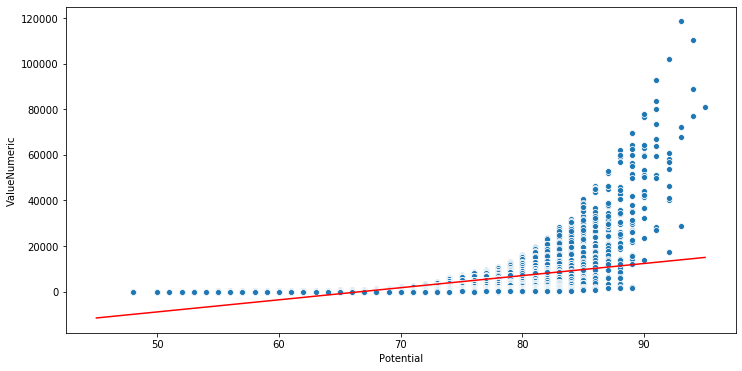

In [19]:
# Your code here:
plt.figure(figsize=(12,6))

sns.scatterplot(x='Potential', y='ValueNumeric', data=fifa )
plt.plot(x_1, y_1, c='r')

In [ ]:
#La relacion que obvservamos es exponencial y no lineal. Podemos ver como la linea roja no se ajusta a nuestros datos